# Hubble data - outline

1. Load the dataset
2. Display data 
3. Compute the exact solution by solving the normal equation (for comparison)
4. Perform linear regression with Scikit-learn
5. Plot and compare results
6. Determine the confidence interval

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# dataset loading 
hubble = pd.read_csv('hubble_data.csv')
distance = hubble['distance']
velocity = hubble['recession_velocity']
hubble.head()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


<br>
<br>
<font color='blue' size=5px>Plot data & correlation</font>

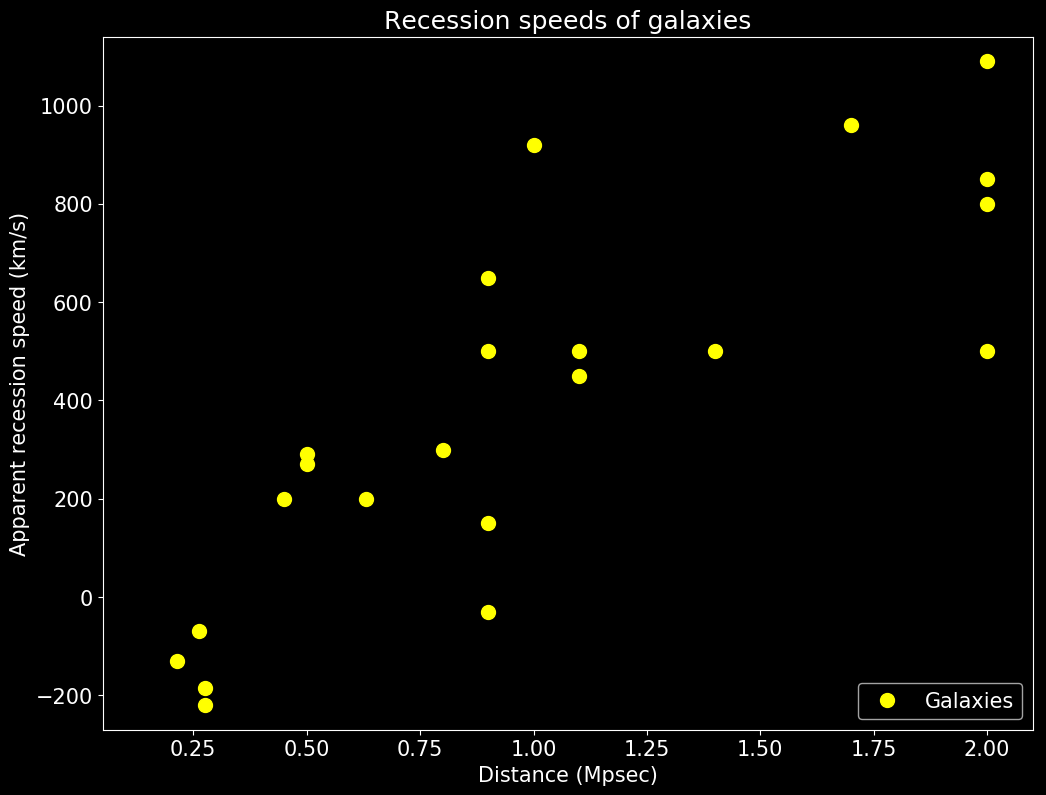

In [9]:
fig = plt.figure(figsize=(12,9))
plt.style.use(plt.style.available[2])
plt.rcParams.update({'font.size' : 15})
Ar = 0.5
Axmin = Ar/10.
Axmax = distance.max()+Ar/5.
Aymin = velocity.min()-Ar*100
Aymax = velocity.max()+Ar*100
plt.axis([Axmin,Axmax,Aymin,Aymax])

s = plt.plot(distance, velocity, 'ro', color='yellow',
             label='Galaxies',markersize=10)
t = plt.title('Recession speeds of galaxies')
t = plt.xlabel('Distance (Mpsec)')
t = plt.ylabel('Apparent recession speed (km/s)')
l = plt.legend(loc='lower right')
plt.show()

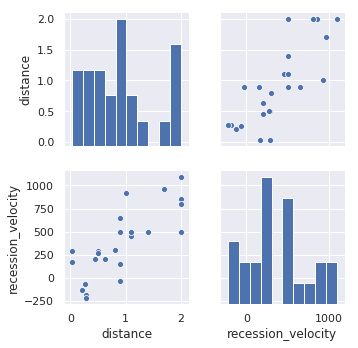

In [3]:
import seaborn as sns
sns.set()

sns.pairplot(hubble)

<br>
<br>
<font color='blue' size=5px>Exact solution</font>

We compute the exact solution of the linear interpolation by solving the normal equation in order to compare the result with the Linear Regression of Scikit-learn.


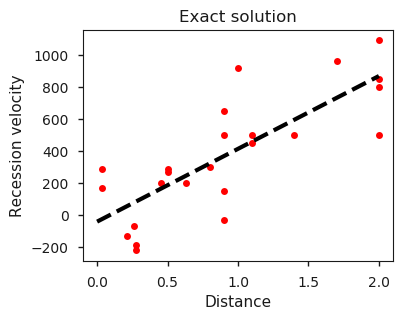

In [4]:
# transformation of the dataset to perform matrix product
X = np.matrix([np.ones(hubble.shape[0]), hubble['distance'].values]).T
y = np.matrix(hubble['recession_velocity']).T
# resolution of the normal equation:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# solution graph:
%matplotlib inline
sns.reset_defaults()
plt.style.use(plt.style.available[0])
fig = plt.figure(figsize=(4,3))
plt.xlabel('Distance')
plt.ylabel('Recession velocity')
plt.plot(distance,velocity,'ro',color='red',markersize=5)
plt.plot([0,2],[theta.item(0),theta.item(0)+2*theta.item(1)],
        linestyle='--',c='#000000', linewidth=3)
plt.title('Exact solution')
plt.show()

<br>
<br>
<font color='blue' size=5px>Linear regression with Scikit-learn</font>

We adopt the Linear regression implemented in Scikit-learn and compare the result with the exact solution.

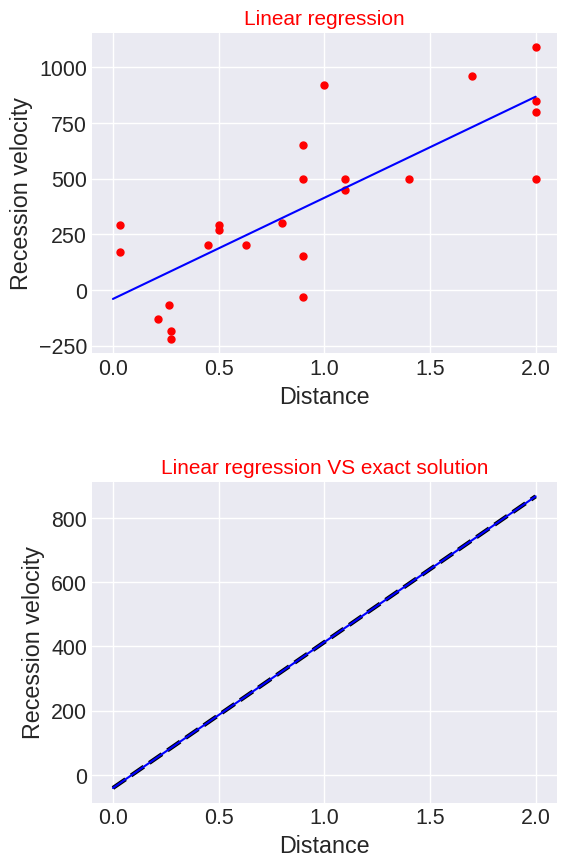


The Scikit-learn Linear Regression perfectly fits the exact solution.



In [11]:
from sklearn import linear_model

x = np.array(distance).reshape(-1,1)
y = np.array(velocity)
# linear regression
reg_lin = linear_model.LinearRegression()
reg_lin.fit(x, y)
# prediction  
xx = np.linspace(0,2,100).reshape(-1, 1)
y_predict = reg_lin.predict(xx)

# FIGURES
sns.set(font_scale=1.4)
plt.style.use('seaborn-darkgrid')
#plt.rcParams.update({'font.size' : 10})
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(6, 10))
fig.subplots_adjust(hspace=0.4)

ax0.set_title("Linear regression", color='red', fontsize=15)
ax0.set_xlabel('Distance')
ax0.set_ylabel('Recession velocity')
ax0.plot(distance,velocity,'ro',color='red',markersize=5)
ax0.plot(xx,y_predict,c='blue')

ax1.set_title('Linear regression VS exact solution', color='red', fontsize=15)
ax1.set_xlabel('Distance')
ax1.set_ylabel('Recession velocity')
ax1.plot([0,2],[theta.item(0),theta.item(0)+2*theta.item(1)],
        linestyle='--',c='#000000', linewidth=3)
ax1.plot(xx,y_predict,c='blue')
plt.show()

print("\nThe Scikit-learn Linear Regression perfectly fits the exact solution.\n")

<br>
<br>
<font color='blue' size=5px>Confidence interval</font>

We estimate the confidence interval of the linear regression.

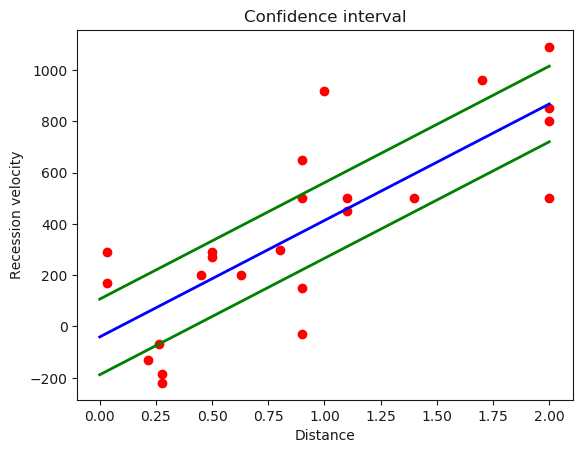

In [6]:
# plotting the confidence interval
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(distance,velocity)
confidence_interval = 1.96*std_err  #use 2.58 for 99%confidence interval

sns.reset_defaults()
plt.rcParams.update({'font.size' : 10})
plt.scatter(distance,velocity,marker='o', c='red')
plt.xlabel('Distance')
plt.ylabel('Recession velocity')
plt.plot(xx, y_predict, color='blue', linewidth=2)
plt.plot(xx, y_predict+confidence_interval, color='green', linewidth=2)
plt.plot(xx, y_predict-confidence_interval, color='green', linewidth=2)
plt.title('Confidence interval')

plt.show()

# Fancy plot

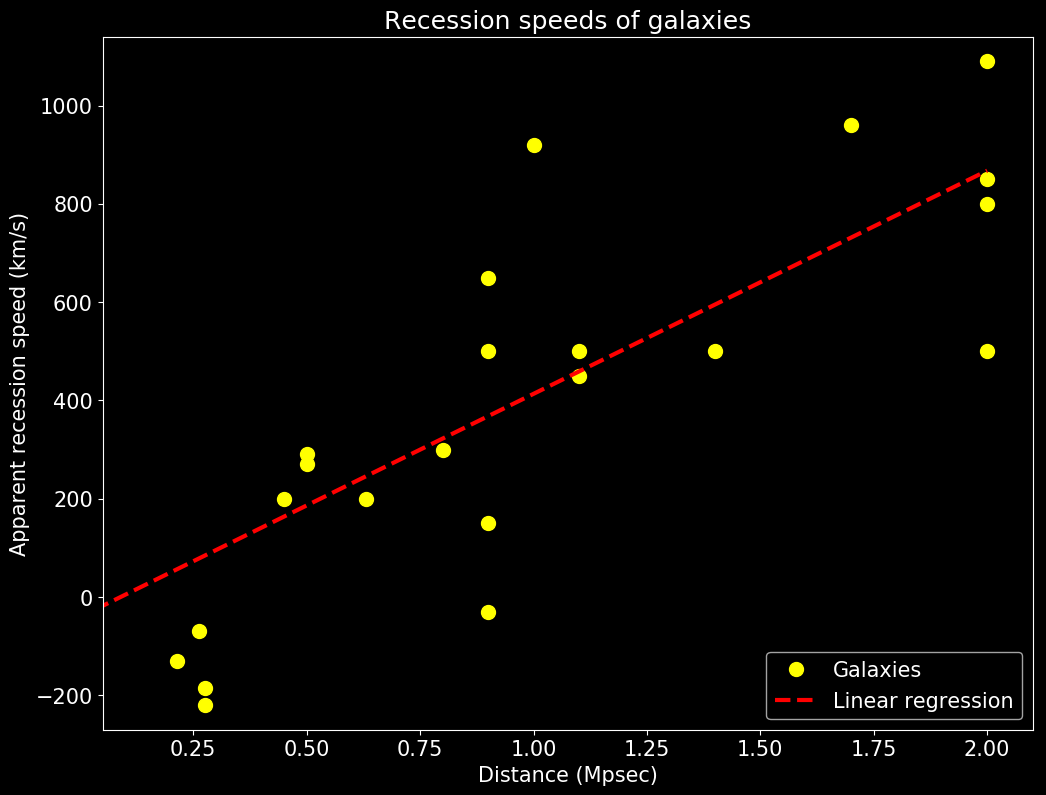

In [8]:
a = reg_lin.coef_
b = reg_lin.intercept_

fig = plt.figure(figsize=(12,9))
plt.style.use(plt.style.available[2])
plt.rcParams.update({'font.size' : 15})
Ar = 0.5
Axmin = Ar/10.
Axmax = distance.max()+Ar/5.
Aymin = velocity.min()-Ar*100
Aymax = velocity.max()+Ar*100
plt.axis([Axmin,Axmax,Aymin,Aymax])
s = plt.plot(distance, velocity, 'ro', color='yellow',
             label='Galaxies',markersize=10)
l = plt.plot(x,b + a*x,color='red',linestyle='--',
             label='Linear regression', linewidth=3)
t = plt.title('Recession speeds of galaxies')
t = plt.xlabel('Distance (Mpsec)')
t = plt.ylabel('Apparent recession speed (km/s)')
l = plt.legend(loc='lower right')
plt.show()